In [1]:
import pandas as pd

In [2]:
# Optional display settings for better notebook formatting
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 10)       # Limit number of rows shown
pd.set_option('display.width', 1000)        # Width of the display in characters

In [3]:
train = pd.read_csv('Train-1542865627584.csv')  # 5,410 rows, Provider fraud labels
benef = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')  # 138,556 rows, Patient info
inpat = pd.read_csv('Train_Inpatientdata-1542865627584.csv')  # 40,474 rows, Hospital stays
outpat = pd.read_csv('Train_Outpatientdata-1542865627584.csv')  # 517,737 rows, Outpatient visits

2. Start with Inpatient Data

In [4]:
inpat

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,2859,1068.0,2009-10-02,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,79902,1068.0,2009-11-06,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,78605,1068.0,2009-11-22,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,7802,1068.0,2009-12-18,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
inpat['InscClaimAmtReimbursed'].sum()

408297020

In [6]:
# Get provider-level IP claims totals
ip_provider_amounts = inpat.groupby('Provider')['InscClaimAmtReimbursed'].sum().reset_index()
ip_provider_amounts = ip_provider_amounts.rename(columns={'InscClaimAmtReimbursed': 'IP_Claims_Total'})

In [7]:
ip_provider_amounts

,Provider,IP_Claims_Total
0,PRV51001,97000
1,PRV51003,573000
2,PRV51007,19000
3,PRV51008,25000
4,PRV51011,5000
...,...,...
2087,PRV57719,76000
2088,PRV57728,6000
2089,PRV57729,107000
2090,PRV57732,76000


In [8]:
ip_provider_amounts['IP_Claims_Total'].sum()

408297020

3. Do the same for Outpatient Data

In [9]:
outpat

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [10]:
outpat['InscClaimAmtReimbursed'].sum()

148246120

In [11]:
# Get provider-level OP claims totals
op_provider_amounts = outpat.groupby('Provider')['InscClaimAmtReimbursed'].sum().reset_index()
op_provider_amounts = op_provider_amounts.rename(columns={'InscClaimAmtReimbursed': 'OP_Claims_Total'})

In [12]:
op_provider_amounts

,Provider,OP_Claims_Total
0,PRV51001,7640
1,PRV51003,32670
2,PRV51004,52170
3,PRV51005,280910
4,PRV51007,14710
...,...,...
5007,PRV57759,10640
5008,PRV57760,4770
5009,PRV57761,18470
5010,PRV57762,1900


In [13]:
op_provider_amounts['OP_Claims_Total'].sum()

148246120

4. Outer Merge on Provider

In [14]:
# Merge IP and OP provider totals
provider_claims = pd.merge(
    ip_provider_amounts,  # Left: Provider, IP_Claims_Total
    op_provider_amounts,  # Right: Provider, OP_Claims_Total
    on='Provider',
    how='outer'
).fillna(0)  # Fill NaN with 0 for providers with only one type of claims

In [15]:
provider_claims

,Provider,IP_Claims_Total,OP_Claims_Total
0,PRV51001,97000.0,7640.0
1,PRV51003,573000.0,32670.0
2,PRV51004,0.0,52170.0
3,PRV51005,0.0,280910.0
4,PRV51007,19000.0,14710.0
...,...,...,...
5405,PRV57759,0.0,10640.0
5406,PRV57760,0.0,4770.0
5407,PRV57761,0.0,18470.0
5408,PRV57762,0.0,1900.0


In [16]:
# Then merge with fraud labels
final_df = pd.merge(
    provider_claims,
    train[['Provider', 'PotentialFraud']],
    on='Provider',
    how='outer'
)

In [17]:
final_df

,Provider,IP_Claims_Total,OP_Claims_Total,PotentialFraud
0,PRV51001,97000.0,7640.0,No
1,PRV51003,573000.0,32670.0,Yes
2,PRV51004,0.0,52170.0,No
3,PRV51005,0.0,280910.0,Yes
4,PRV51007,19000.0,14710.0,No
...,...,...,...,...
5405,PRV57759,0.0,10640.0,No
5406,PRV57760,0.0,4770.0,No
5407,PRV57761,0.0,18470.0,No
5408,PRV57762,0.0,1900.0,No


In [18]:
# Cross Check: 
print("Total sums:")
print("Total IP Claims:", final_df['IP_Claims_Total'].sum())
print("Total OP Claims :", final_df['OP_Claims_Total'].sum())

Total sums:
Total IP Claims: 408297020.0
Total OP Claims : 148246120.0


In [19]:
# Save final_df as a CSV file
final_df.to_csv("Merge_providerlevel_InscclmAmtReibursed.csv", index=False)

5. Visualizing Features

<Figure size 1000x500 with 0 Axes>

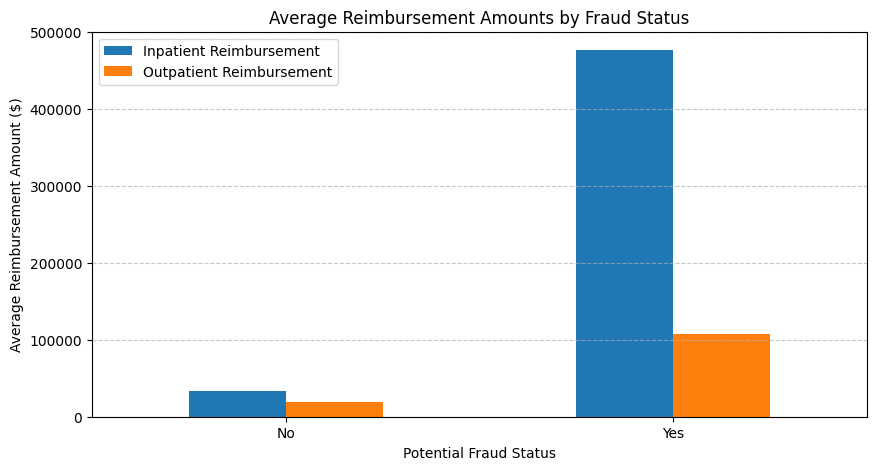

In [20]:
import matplotlib.pyplot as plt

# Grouping by PotentialFraud and calculating mean reimbursement amounts
fraud_summary = final_df.groupby("PotentialFraud")[
    ["IP_Claims_Total", "OP_Claims_Total"]
].mean()

# Plotting Inpatient and Outpatient Reimbursement Comparisons
plt.figure(figsize=(10, 5))
fraud_summary.plot(kind="bar", figsize=(10, 5), rot=0)
plt.title("Average Reimbursement Amounts by Fraud Status")
plt.ylabel("Average Reimbursement Amount ($)")
plt.xlabel("Potential Fraud Status")
plt.xticks(rotation=0)
plt.legend(["Inpatient Reimbursement", "Outpatient Reimbursement"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [21]:
fraud_summary

,IP_Claims_Total,OP_Claims_Total
PotentialFraud,,
No,34055.568923,19138.154568
Yes,476854.762846,107495.276680


Blog Code

In [22]:
import pandas as pd

train = pd.read_csv('Train-1542865627584.csv')  # 5,410 rows, Provider fraud labels
inpat = pd.read_csv('Train_Inpatientdata-1542865627584.csv')  # 40,474 rows, Hospital stays
outpat = pd.read_csv('Train_Outpatientdata-1542865627584.csv')  # 517,737 rows, Outpatient visits

# Get provider-level IP claims totals
ip_provider_amounts = inpat.groupby('Provider')['InscClaimAmtReimbursed'].sum().reset_index()
ip_provider_amounts = ip_provider_amounts.rename(columns={'InscClaimAmtReimbursed': 'IP_Claims_Total'})

# Get provider-level OP claims totals
op_provider_amounts = outpat.groupby('Provider')['InscClaimAmtReimbursed'].sum().reset_index()
op_provider_amounts = op_provider_amounts.rename(columns={'InscClaimAmtReimbursed': 'OP_Claims_Total'})

# Merge IP and OP provider totals
provider_claims = pd.merge(
    ip_provider_amounts,  # Left: Provider, IP_Claims_Total
    op_provider_amounts,  # Right: Provider, OP_Claims_Total
    on='Provider',
    how='outer'
).fillna(0)  # Fill NaN with 0 for providers with only one type of claims

# Then merge with fraud labels
final_df = pd.merge(
    provider_claims,
    train[['Provider', 'PotentialFraud']],
    on='Provider',
    how='outer'
)

final_df

,Provider,IP_Claims_Total,OP_Claims_Total,PotentialFraud
0,PRV51001,97000.0,7640.0,No
1,PRV51003,573000.0,32670.0,Yes
2,PRV51004,0.0,52170.0,No
3,PRV51005,0.0,280910.0,Yes
4,PRV51007,19000.0,14710.0,No
...,...,...,...,...
5405,PRV57759,0.0,10640.0,No
5406,PRV57760,0.0,4770.0,No
5407,PRV57761,0.0,18470.0,No
5408,PRV57762,0.0,1900.0,No


In [23]:
print(final_df)

      Provider  IP_Claims_Total  OP_Claims_Total PotentialFraud
0     PRV51001          97000.0           7640.0             No
1     PRV51003         573000.0          32670.0            Yes
2     PRV51004              0.0          52170.0             No
3     PRV51005              0.0         280910.0            Yes
4     PRV51007          19000.0          14710.0             No
...        ...              ...              ...            ...
5405  PRV57759              0.0          10640.0             No
5406  PRV57760              0.0           4770.0             No
5407  PRV57761              0.0          18470.0             No
5408  PRV57762              0.0           1900.0             No
5409  PRV57763              0.0          43610.0             No

[5410 rows x 4 columns]


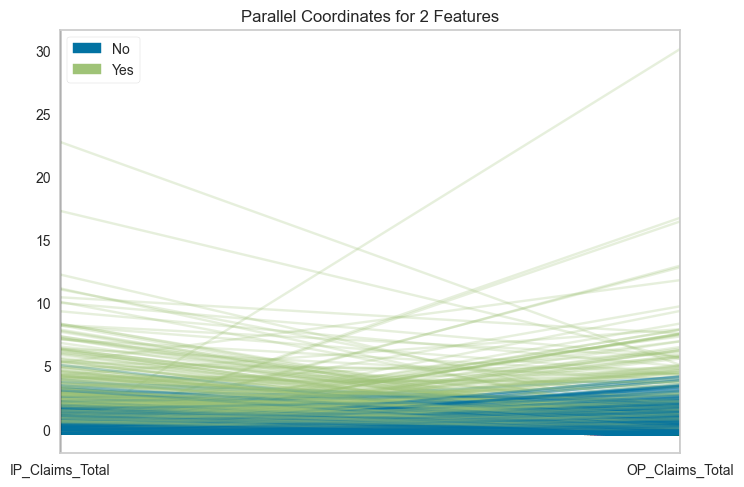

In [24]:
# Parallel Coordinates: Visualize how individual feature values vary across classes.

from yellowbrick.features import ParallelCoordinates
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = final_df[['IP_Claims_Total', 'OP_Claims_Total']]
y = (final_df['PotentialFraud'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


visualizer_parallel = ParallelCoordinates()
visualizer_parallel.fit_transform(X_scaled, y)
visualizer_parallel.show();